In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Cancer%20Data%20Brazil/municipio.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
df1.head()

,ano,sigla_uf,id_municipio,populacao
0,1991,RO,1100015,31981.0
1,1992,RO,1100015,34768.0
2,1993,RO,1100015,37036.0
3,1994,RO,1100015,39325.0
4,1995,RO,1100015,41574.0


In [3]:
df = pd.read_csv('../input/cancer-data-brazil/cancer_data_eng.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
df.head()

,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0


In [4]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1778176 rows and 38 columns


In [5]:
len(df1)

168818

total outliers 0


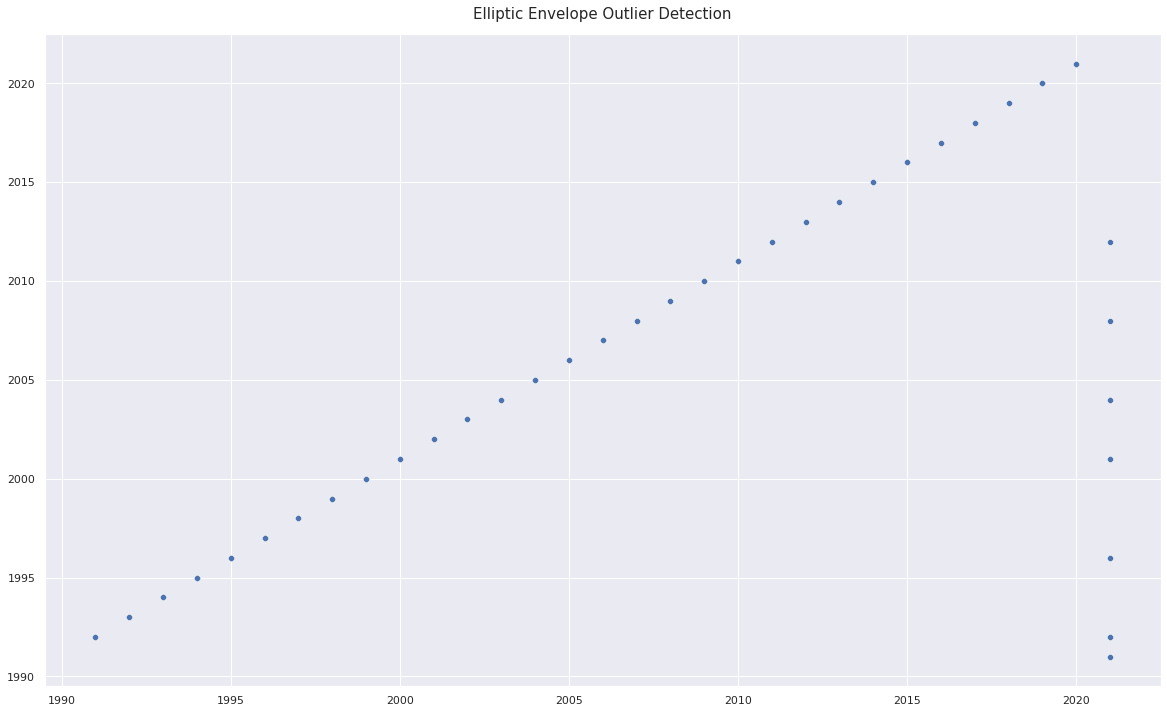

In [6]:
from sklearn.covariance import EllipticEnvelope
X= df1["ano"].values
X=X.reshape((84409,2)) # 13149 = len(X)/2 since X need to be 2D array
envlp = EllipticEnvelope(contamination = 0.02 ,random_state=10)  # contamination == % of data outside ellipse
pred = envlp.fit_predict(X)
outlier_index = np.where(pred<=-1)
outlier_values = X[outlier_index]

sns.set(rc={'figure.figsize':(20,12)})
sns.set_style('darkgrid')
sns.scatterplot(x=X[:,0], y=X[:,1] )
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.title("Elliptic Envelope Outlier Detection", fontsize=15, pad=15)


print("total outliers" ,outlier_values.size)

In [7]:
df.isnull().sum()

Patient.Code                         74429
RCBP.Name                                0
Gender                                   0
Date.of.Birth                       768445
Age                                  79972
Raca.Color                          785048
Nationality                         962996
Naturality.State                   1326620
Naturality                         1591764
Degree.of.Education                1372348
State.Civil                        1179041
Code.Profession                     140150
Name.Occupation                     140150
Status.Address                       64197
City.Address                         63842
Description.of.Topography                0
Topography.Code                          0
Morphology.Description                   0
Code.of.Morphology                       0
Description.of.Disease                   0
Illness.Code                             0
Child.Illness.Description          1079470
Child.Illness.Code                 1079470
Youth.Adult

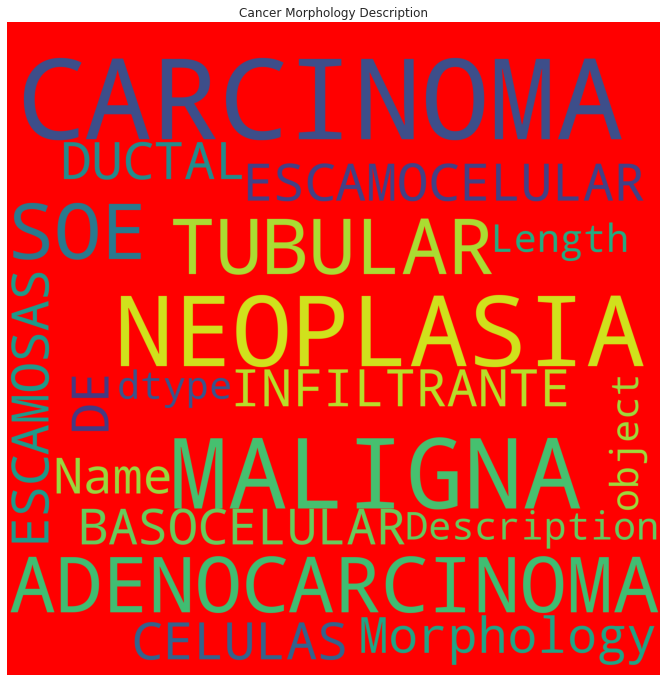

In [8]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'red',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Morphology.Description"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Cancer Morphology Description")
plt.show()

In [9]:
df["Age"].value_counts()

65.0     41396
68.0     39615
64.0     39421
67.0     39088
63.0     39066
         ...  
118.0        1
152.0        1
153.0        1
124.0        1
151.0        1
Name: Age, Length: 128, dtype: int64

In [10]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 243 kB/s            


In [11]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

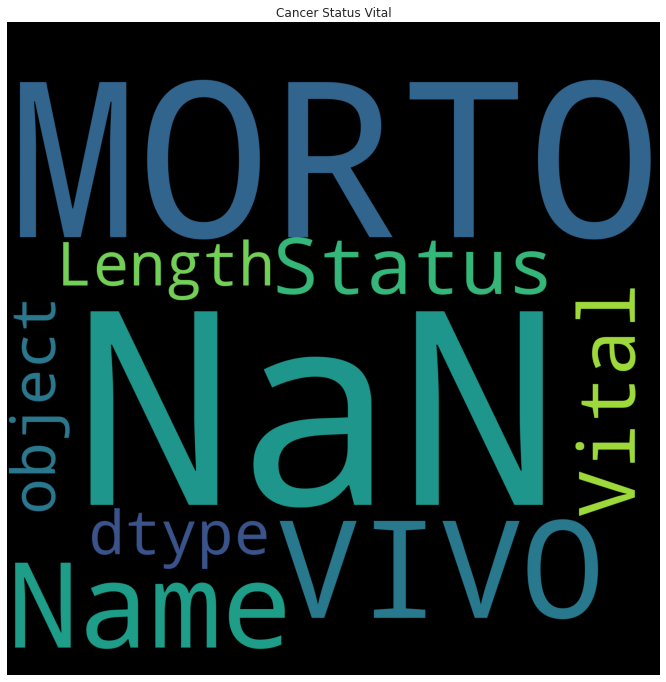

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Status.Vital"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Cancer Status Vital")
plt.show()

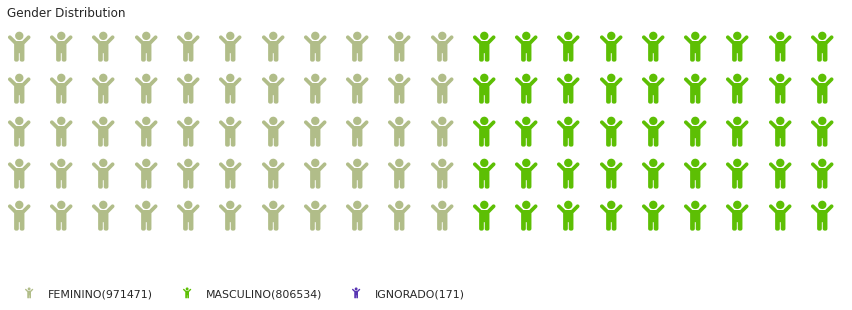

In [13]:
from pywaffle import Waffle
import random

gender = df["Gender"].value_counts()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=gender,
    colors = random_colors(len(gender)),
    title={'label': 'Gender Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(df.groupby("Age")), 'framealpha': 0},
    font_size=30, 
    icons = 'child',
    figsize=(12, 5),  
    icon_legend=True
)

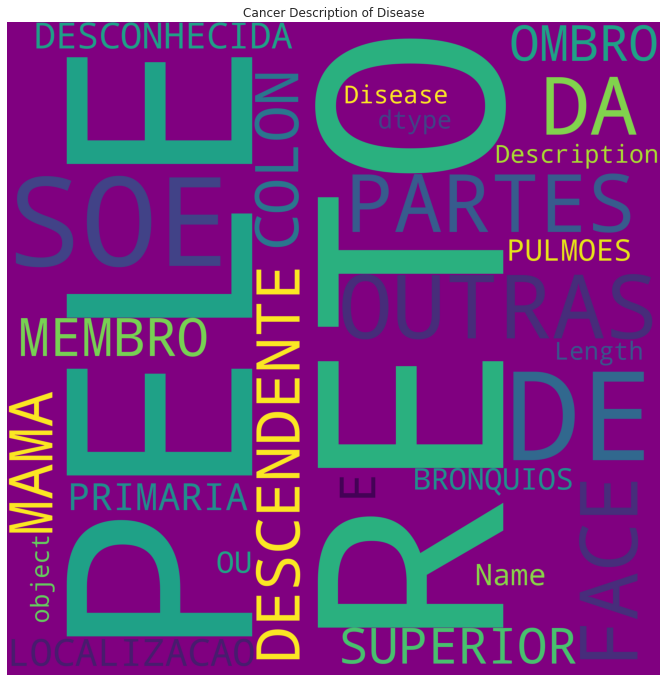

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'Purple',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Description.of.Disease"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Cancer Description of Disease")
plt.show()

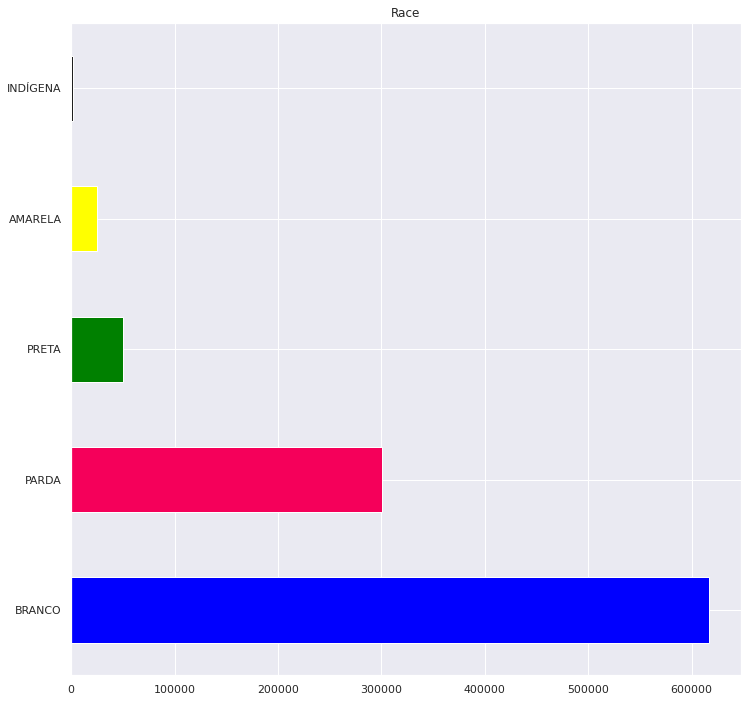

In [15]:
df["Raca.Color"].value_counts().plot.barh(color=['blue', '#f5005a', 'green', 'yellow', 'black'], title='Race');

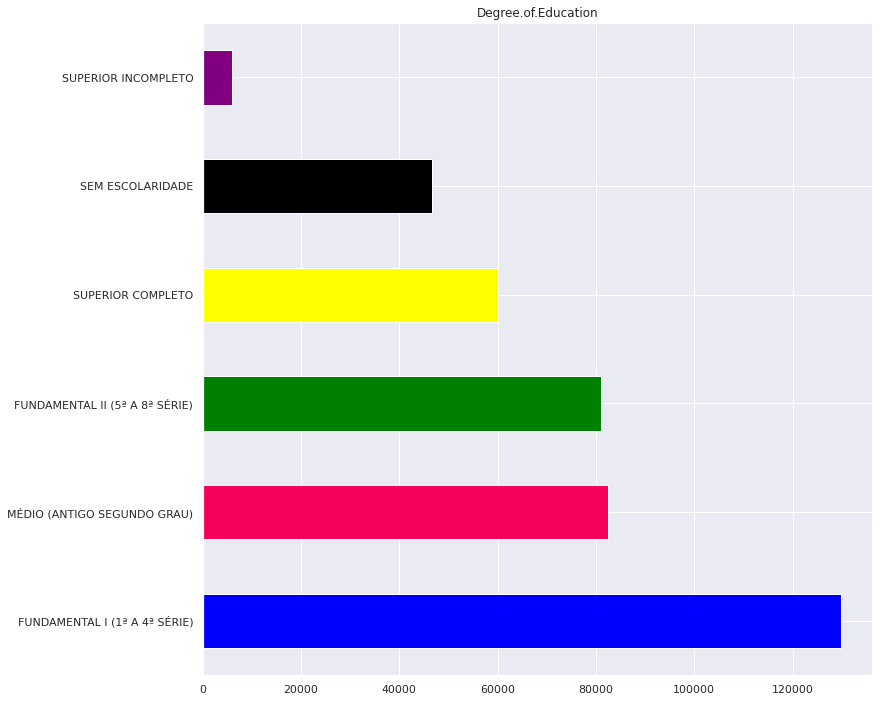

In [16]:
df["Degree.of.Education"].value_counts().plot.barh(color=['blue', '#f5005a', 'green', 'yellow', 'black', 'purple'], title='Degree.of.Education');

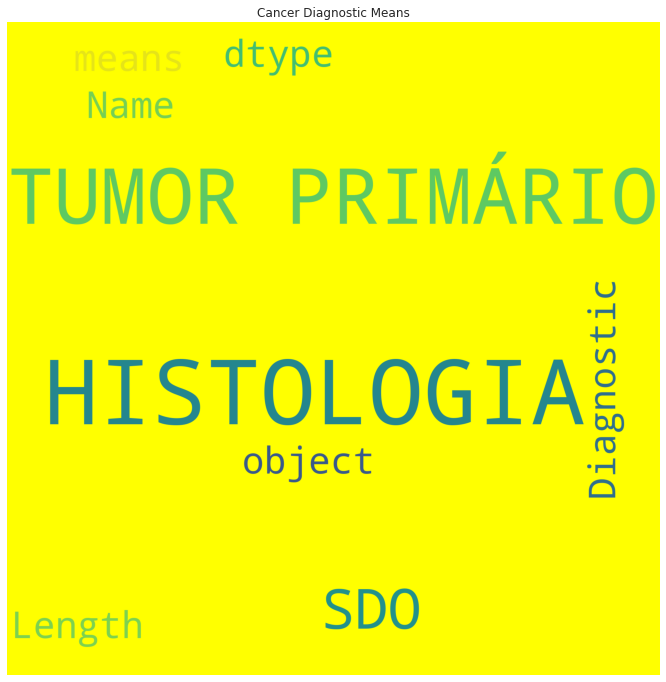

In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'Yellow',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Diagnostic.means"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Cancer Diagnostic Means")
plt.show()

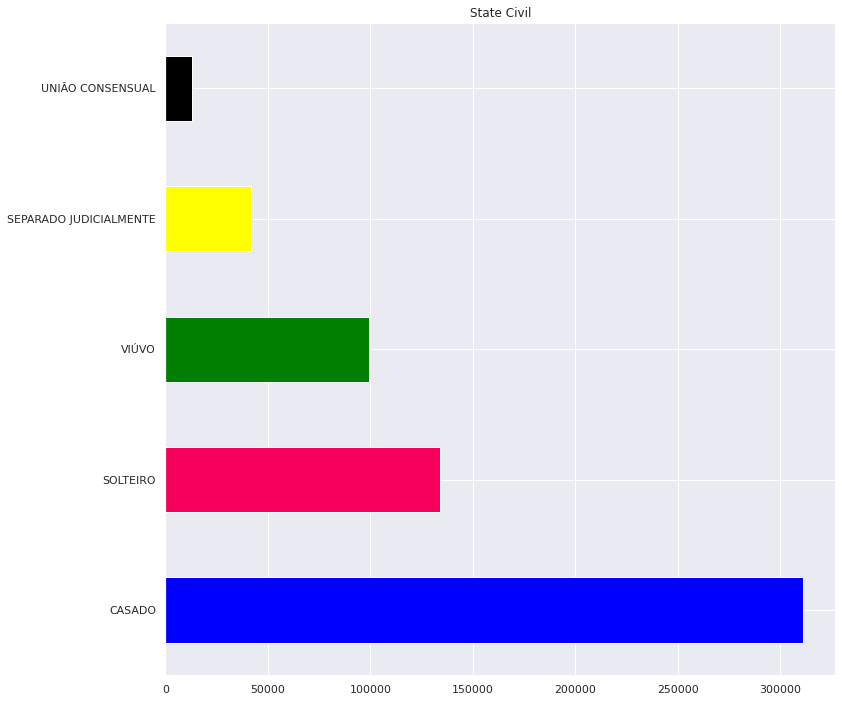

In [18]:
df["State.Civil"].value_counts().plot.barh(color=['blue', '#f5005a', 'green', 'yellow', 'black'], title='State Civil');

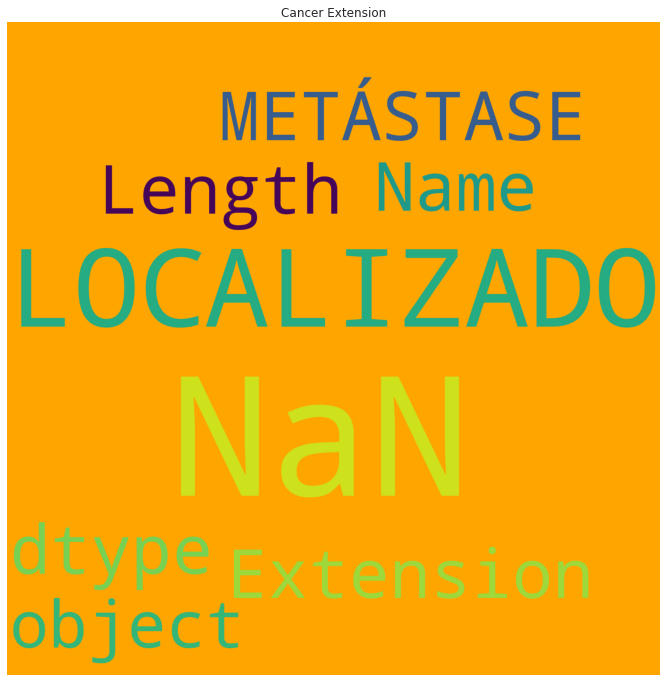

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'Orange',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Extension"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Cancer Extension")
plt.show()